# Lags, Differencing, AR, and MA

The goal of time series is similar to regressions in that we are trying to separate **trends/patterns/model** from **resisduals/noise**. The difference is that time is a useful component in finding trends/patterns.

Today, we will study **how** time variable is used in finding patterns.

## Agenda

1. Lags and Differencing
2. Autoregression (AR)
3. Rolling Window or moving average (MA)

Let us use the same example to explore these concepts:


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [35]:
df = pd.read_csv('data/multiTimeline.csv', skiprows=1)
df

,월,diet: (전 세계),gym: (전 세계),finance: (전 세계)
0,2004-01,100,31,48
1,2004-02,75,26,50
2,2004-03,72,26,45
3,2004-04,69,22,47
4,2004-05,73,22,43
...,...,...,...,...
195,2020-04,36,36,64
196,2020-05,43,38,61
197,2020-06,43,42,67
198,2020-07,43,44,63


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   월                200 non-null    object
 1   diet: (전 세계)     200 non-null    int64 
 2   gym: (전 세계)      200 non-null    int64 
 3   finance: (전 세계)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [36]:
df.columns = ['month', 'diet', 'gym', 'finance']
df['month']

0      2004-01
1      2004-02
2      2004-03
3      2004-04
4      2004-05
        ...   
195    2020-04
196    2020-05
197    2020-06
198    2020-07
199    2020-08
Name: month, Length: 200, dtype: object

In [37]:
df.month = pd.to_datetime(df.month)
df['month']

0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
195   2020-04-01
196   2020-05-01
197   2020-06-01
198   2020-07-01
199   2020-08-01
Name: month, Length: 200, dtype: datetime64[ns]

In [38]:
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,50
2004-03-01,72,26,45
2004-04-01,69,22,47
2004-05-01,73,22,43


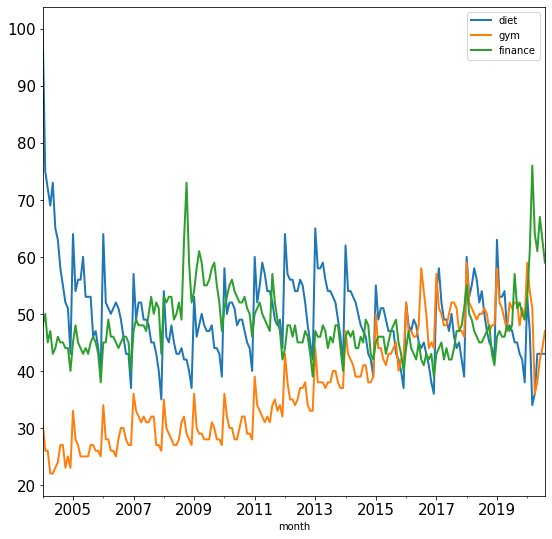

In [39]:
df.plot(figsize=(9,9), linewidth=2, fontsize=15)

## Lags and Differencing

### Lags
- Normally, "lag of $X_t$" is denoted $LX_t = X_{t-1}$, $L^2X_t=X_{t-2}$, and etc. 
- In data, usually create lags by shifting index by one, and normally you loose one data point

In [40]:
df['diet']

month
2004-01-01    100
2004-02-01     75
2004-03-01     72
2004-04-01     69
2004-05-01     73
             ... 
2020-04-01     36
2020-05-01     43
2020-06-01     43
2020-07-01     43
2020-08-01     43
Name: diet, Length: 200, dtype: int64

In [52]:
pd.merge(df['diet'],df['diet'].shift(3),left_index=True, right_index=True)

,diet_x,diet_y
month,,
2004-01-01,100,NaN
2004-02-01,75,NaN
2004-03-01,72,NaN
2004-04-01,69,100.0
2004-05-01,73,75.0
...,...,...
2020-04-01,36,53.0
2020-05-01,43,47.0
2020-06-01,43,34.0


In [47]:
pd.merge(df['diet'],df['diet'].shift(-1),left_index=True, right_index=True)

,diet_x,diet_y
month,,
2004-01-01,100,75.0
2004-02-01,75,72.0
2004-03-01,72,69.0
2004-04-01,69,73.0
2004-05-01,73,65.0
...,...,...
2020-04-01,36,43.0
2020-05-01,43,43.0
2020-06-01,43,43.0


In [48]:
df['diet1'] = df['diet'].shift(-1)
df['diet1']

month
2004-01-01    75.0
2004-02-01    72.0
2004-03-01    69.0
2004-04-01    73.0
2004-05-01    65.0
              ... 
2020-04-01    43.0
2020-05-01    43.0
2020-06-01    43.0
2020-07-01    43.0
2020-08-01     NaN
Name: diet1, Length: 200, dtype: float64

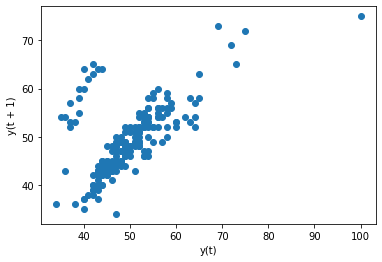

In [50]:
pd.plotting.lag_plot(df['diet'],lag=1)

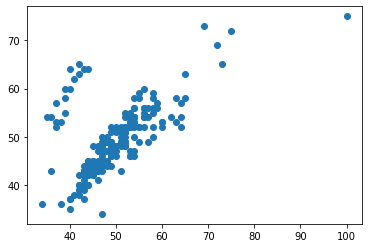

In [49]:
plt.scatter(df['diet'],df['diet1'])

### Differencing

- Change between consecutive observations, and can be written as: $$y'_t=y_t-y_{t-1}$$
- Second -order differencing: $$ \begin{align} y''_t & = y'_t-y'_{t-1} \\ & = (y_t-y_{t-1}) - (y_{t-1}-y_{t-2}) \end{align} $$
- Seasonal (or "lag-m differencing"): $$y'_t=y_t-y_{t-m}$$ where $m$ is the period for a season

In [53]:
df['diet']

month
2004-01-01    100
2004-02-01     75
2004-03-01     72
2004-04-01     69
2004-05-01     73
             ... 
2020-04-01     36
2020-05-01     43
2020-06-01     43
2020-07-01     43
2020-08-01     43
Name: diet, Length: 200, dtype: int64

In [55]:
df['diet'].diff(1)

month
2004-01-01     NaN
2004-02-01   -25.0
2004-03-01    -3.0
2004-04-01    -3.0
2004-05-01     4.0
              ... 
2020-04-01     2.0
2020-05-01     7.0
2020-06-01     0.0
2020-07-01     0.0
2020-08-01     0.0
Name: diet, Length: 200, dtype: float64

In [58]:
pd.merge(df['diet'], df['diet'].diff(periods=2),left_index=True, right_index=True)

,diet_x,diet_y
month,,
2004-01-01,100,NaN
2004-02-01,75,NaN
2004-03-01,72,-28.0
2004-04-01,69,-6.0
2004-05-01,73,1.0
...,...,...
2020-04-01,36,-11.0
2020-05-01,43,9.0
2020-06-01,43,7.0


In [67]:
pd.merge(df['diet'], df['diet'].diff(periods=1).diff(periods=1), left_index=True, right_index=True)

,diet_x,diet_y
month,,
2004-01-01,100,NaN
2004-02-01,75,NaN
2004-03-01,72,22.0
2004-04-01,69,0.0
2004-05-01,73,7.0
...,...,...
2020-04-01,36,15.0
2020-05-01,43,5.0
2020-06-01,43,-7.0


- Differencing can eliminates (or reduces) trend and seasonality

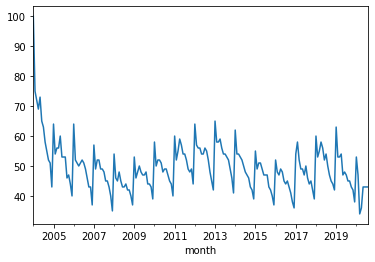

In [17]:
df['diet'].plot()

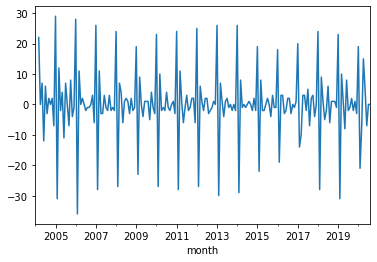

In [66]:
df['diet'].diff(periods=1).diff(periods=1).plot()

See that you have removed much of the trend and you can really see the peaks in January every year. Note: You can also perform additional data manipulations (e.g., 2nd order differencing) if the trend is not yet entirely removed. See [here](https://otexts.com/fpp2/stationarity.html) for more on differencing.

Differencing can be helpful in turning your time series into a stationary time series. 

> Stationarity: properties of the data generating process do not depend on the time at which the series is observed.

Stationary time series are useful because many time series forecasting methods are based on the assumption that the time series is approximately stationary.

More noticeable example can be found in asset prices. For example, let's look into 200 consecurive days of Google stock price and differenced value.

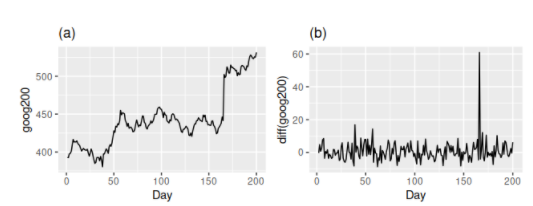

In [19]:
from PIL import Image
Image.open("images/GOOGdiff.png")

## Autoregression

- The model predicts the variable of interest using a linear combination of **historical** values of the variable. 
- An **AR(p) model** is written as:
$$y_t = \beta_0 + \beta_1y_{t-1} + \beta_2y_{t-2} + \cdots + \beta_py_{t-p}+\epsilon_t$$

For an AR(1) model, when:

$$y_t = \beta_0 + \beta_1y_{t-1} +\epsilon_t$$

- $\beta_1=0$, the model, or $y_t$ is equivalent to noise
- $\beta_1=1$ and $\beta_0=0$, the model, or $y_t$ is equivalent to random walk 
- $\beta_1=1$ and $\beta_0 \neq 0$, the model, or $y_t$ is equivalent to random walk with a drift 
- $\beta_1<0$, $y_t$ tends to oscillate around the mean

We normally use autoregressive models for the following stationary cases:
- for an AR(1) model, $-1<\beta_1<1$
- for an AR(2) model, $-1<\beta_2<1,\beta_1+\beta_2<1,\beta_2-\beta_1<1$

when $p\geq3$, the conditions are more complicated.

In [68]:
df.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', name='month', length=200, freq=None)

In [72]:
pd.Index(pd.date_range(start="2004-01-01", end="2020-08-01", freq="MS"))

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', length=200, freq='MS')

In [97]:
df.index = pd.Index(pd.date_range("2004-01-01", end="2020-08-01", freq="MS"))
df.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01'],
              dtype='datetime64[ns]', length=200, freq='MS')

pip install statsmodels

In [98]:
model = ARMA(df['diet'], order=(3,0))
result = model.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                   diet   No. Observations:                  200
Model:                     ARMA(3, 0)   Log Likelihood                -645.318
Method:                       css-mle   S.D. of innovations              6.080
Date:                Thu, 24 Sep 2020   AIC                           1300.636
Time:                        10:27:59   BIC                           1317.128
Sample:                    01-01-2004   HQIC                          1307.310
                         - 08-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9922      2.671     19.088      0.000      45.756      56.228
ar.L1.diet     0.4912      0.075      6.545      0.000       0.344       0.638
ar.L2.diet     0.2290      0.082      2.804      0.0

In [101]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(df['diet'], order=(2,0))
result = model.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                   diet   No. Observations:                  200
Model:                     ARMA(2, 0)   Log Likelihood                -646.500
Method:                       css-mle   S.D. of innovations              6.119
Date:                Thu, 24 Sep 2020   AIC                           1301.000
Time:                        10:28:22   BIC                           1314.193
Sample:                    01-01-2004   HQIC                          1306.339
                         - 08-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.6216      2.107     24.031      0.000      46.493      54.750
ar.L1.diet     0.5187      0.073      7.059      0.000       0.375       0.663
ar.L2.diet     0.2778      0.076      3.658      0.0

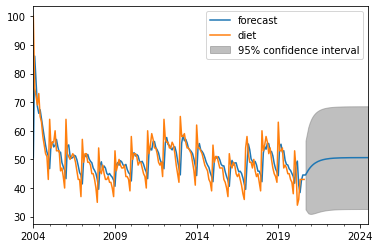

In [102]:
result.plot_predict(start='2004-01-01',end='2024-07-01')
plt.show()

## Moving Average
- Rather than using the past values, a moving average model uses past **errors** in a regression.
- An **MA(q) model** is written as: $$y_t=\beta_0+\epsilon_t+\beta_1\epsilon_{t-1}+\cdots+\beta_q\epsilon_{t-q}$$

We normally use moving average models for the following (invertibility) cases:
- for an MA(1) model, $-1<\beta_1<1$
- for an MA(2) model, $-1<\beta_2<1,\beta_1+\beta_2>-1,\beta_1-\beta_2<1$

when $p\geq3$, the conditions are more complicated.

In [105]:
from statsmodels.tsa.arima_model import ARIMA
model = ARMA(df['diet'], order=(0,5))
result = model.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                   diet   No. Observations:                  200
Model:                     ARMA(0, 5)   Log Likelihood                -650.227
Method:                       css-mle   S.D. of innovations              6.236
Date:                Thu, 24 Sep 2020   AIC                           1314.455
Time:                        10:58:00   BIC                           1337.543
Sample:                    01-01-2004   HQIC                          1323.798
                         - 08-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0204      1.171     42.709      0.000      47.725      52.316
ma.L1.diet     0.5235      0.077      6.827      0.000       0.373       0.674
ma.L2.diet     0.4956      0.099      4.987      0.0

In [112]:
model = ARMA(df['diet'], order=(0,4))
result = model.fit()
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                   diet   No. Observations:                  200
Model:                     ARMA(0, 4)   Log Likelihood                -650.266
Method:                       css-mle   S.D. of innovations              6.236
Date:                Thu, 24 Sep 2020   AIC                           1312.533
Time:                        10:59:50   BIC                           1332.323
Sample:                    01-01-2004   HQIC                          1320.542
                         - 08-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.0130      1.165     42.914      0.000      47.729      52.297
ma.L1.diet     0.5186      0.073      7.065      0.000       0.375       0.662
ma.L2.diet     0.4990      0.099      5.022      0.0

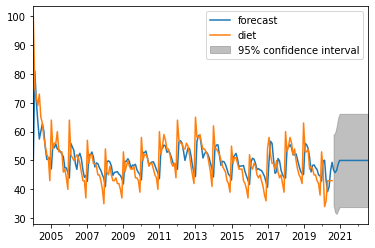

In [113]:
result.plot_predict(start='2004-01-01',end='2022-08-01')
plt.show()

## Recap:
- You've learned the concepts of lags, and differences.
- You've leraned to visualize the relationships for easier interpretation/undertanding.
- You've learned the theory of AR and MA models.
- You've implemented, interpreted, and visualized the AR and MA models in Python.


## Up next:
Deeper look at time series modeling by further learn inaddition to AR and MA model
- ARMA models
- ARIMA models

## References

The materials presented here are inspired and modified from the following sources:
- https://otexts.com/fpp2/
- https://github.com/CodeOp-tech/tsa-soyhyoj/blob/master/New_Years_Resolutions_Workshop.ipynb
- https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/
- https://s3.amazonaws.com/assets.datacamp.com/production/course_4267/slides/chapter3.pdf